In [30]:
import numpy as np
import scipy.integrate as integrate
import general_billiard_cell as gbc

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

img_path_ = "../../AllWriteUps/Thesis/imgs/"

In [2]:
bumps_family = "../newdat/bumps_by_r/"
cha_obs = lambda x, rad, cut: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)

#---first values---#
P_stacks = np.load(bumps_family + "p_mats.npy", allow_pickle=False)
params = np.load(bumps_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(bumps_family + "theta_partition.npy", allow_pickle=False)

In [3]:
params[27]

array([0.753])

In [21]:
channel_radii = 1/4
channel_lenghts = np.arange(10, 5*(10**4), 10)

line_styles = ["-", "-.", ":"]

In [22]:
var_list, zvar_list = [], []
for c in channel_lenghts:
    #print(f"radius {r}, half length {c}")
    #---compute variance---#
    cvar_ = gbc.var_from_P(
        P_=P_stacks[27],
        angle_bins_=theta_partition,
        observable_f=lambda x: cha_obs(x, cut=c, rad=channel_radii)
    )
    var_list.append(cvar_)

    #---compute variance for iid chain---#
    T = np.arctan(2*channel_radii/c)
    #print(T)
    I_one = 2*integrate.quad(lambda x: (1/np.tan(x)**2)*np.sin(x), T, np.pi-T)[0]
    I_two = (c**2)*(1-np.cos(T))
    zvar_list.append(I_one+I_two)
var_list = np.array(var_list)
zvar_list = np.array(zvar_list)

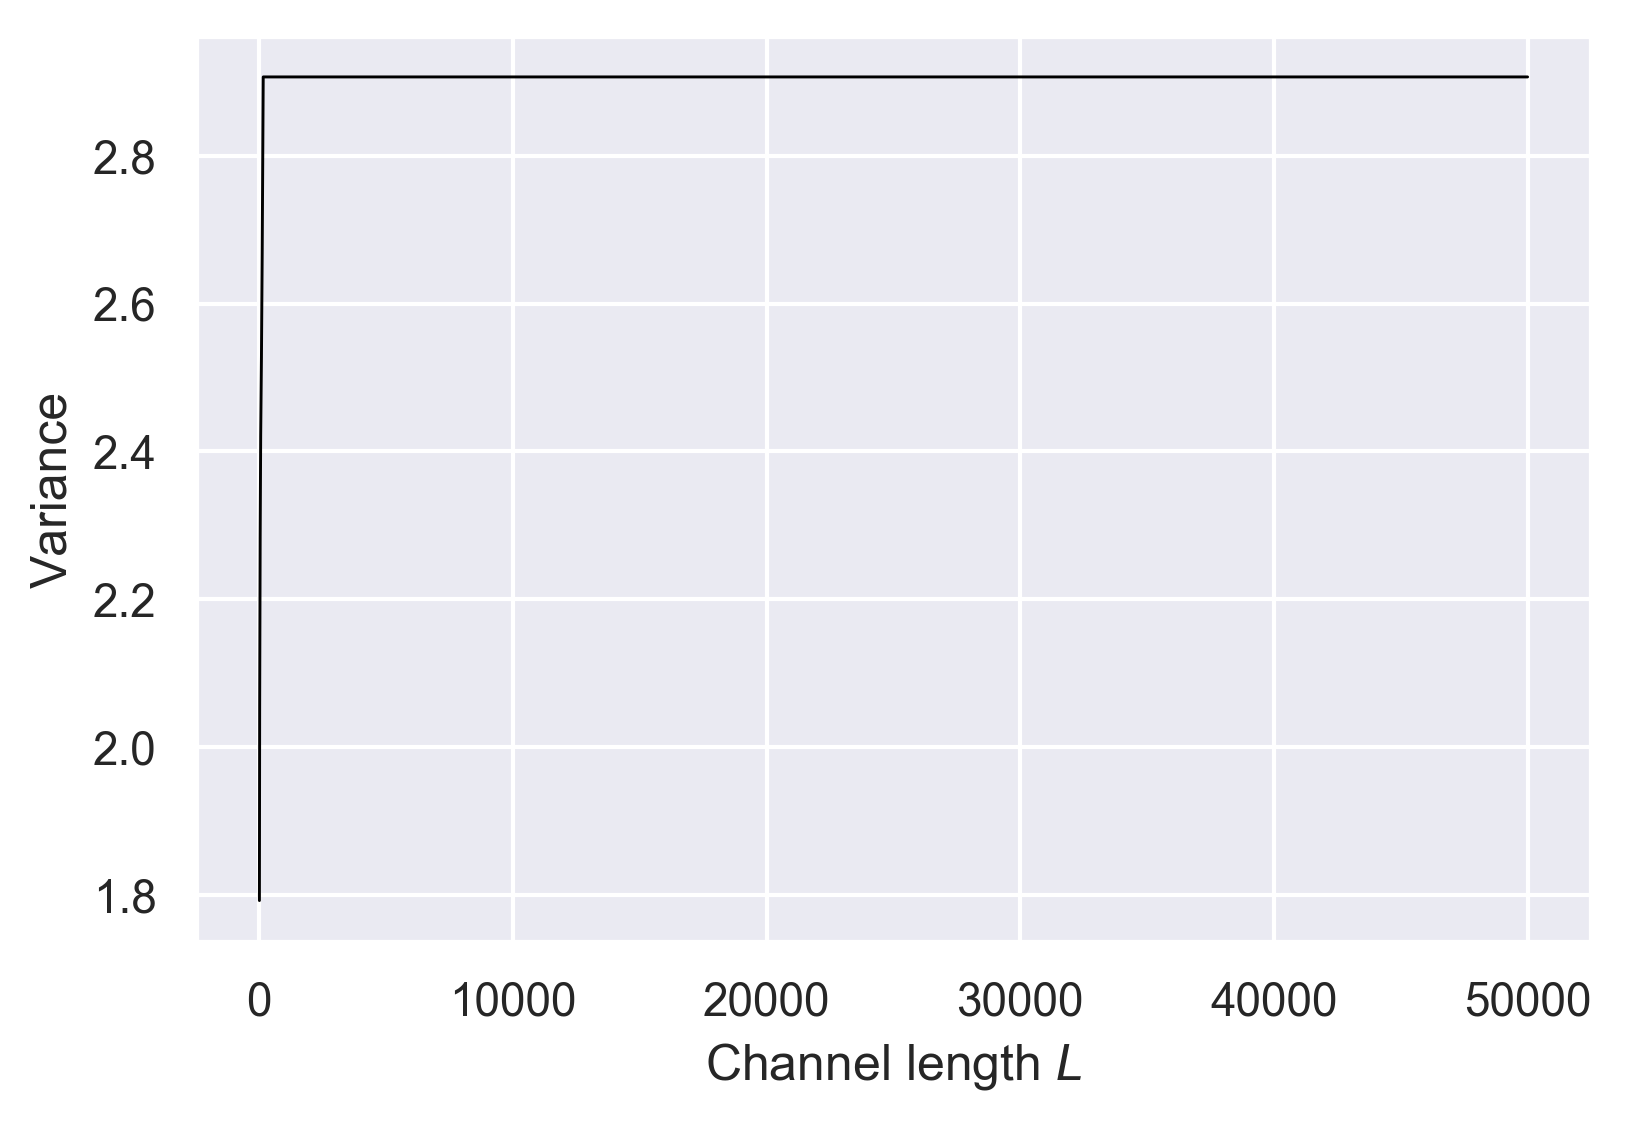

In [23]:
plt.plot( 
    channel_lenghts,
    var_list,
    color="black",
    lw=0.7
)
plt.xlabel(r"Channel length $a$")
plt.ylabel("Variance")
plt.legend()
plt.show()

In [24]:
scaling = -np.log(np.tan(np.arctan(1/channel_lenghts)/2))

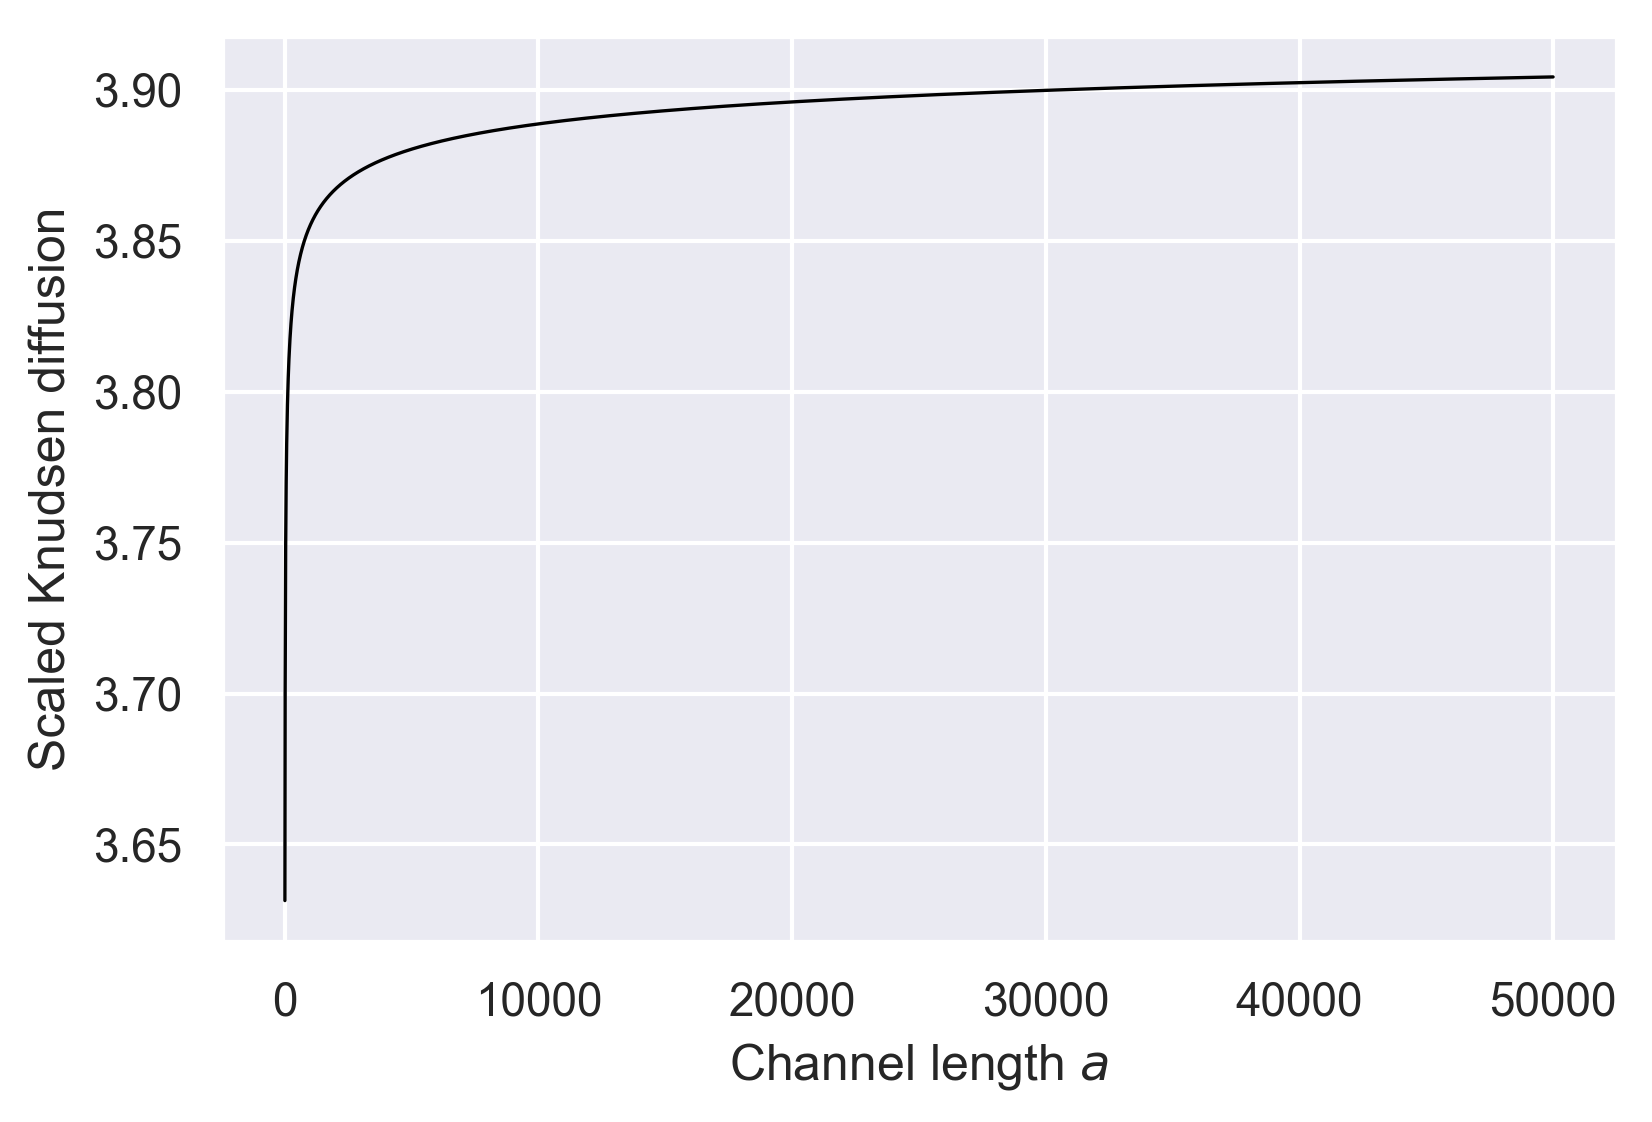

In [33]:
plt.plot(
        channel_lenghts,
        zvar_list/scaling,
        color="black",
        lw=0.8,
    )
plt.xlabel(r"Channel length $a$")
plt.ylabel("Scaled Knudsen diffusion")
plt.legend()

plt.savefig(filename=img_path_+"channel_params_knudsen_small_curvature.eps", bbox_inches='tight')
plt.show()

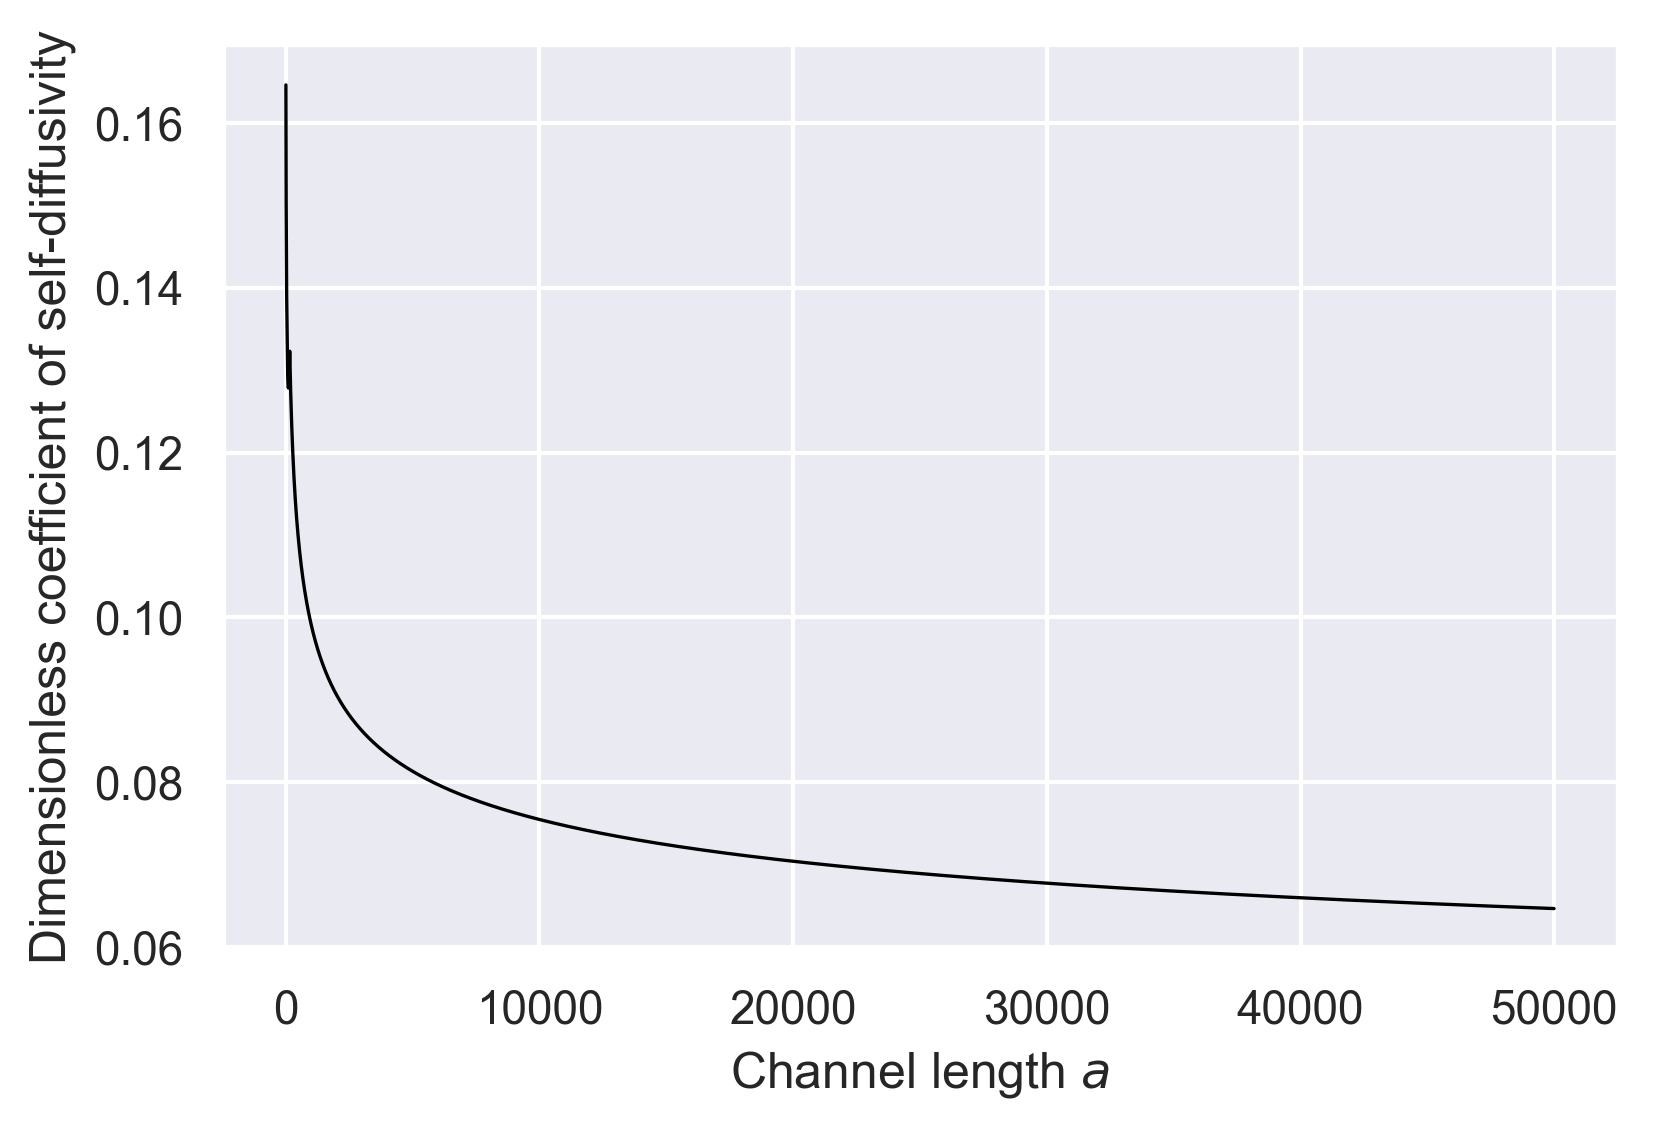

In [36]:
plt.plot(
        channel_lenghts,
        var_list/zvar_list,
        color="black",
        lw=0.8,
    )
plt.xlabel(r"Channel length $a$")
plt.ylabel(r"Dimensionless coefficient of self-diffusivity")
plt.legend()
plt.savefig(filename=img_path_+"channel_params_acc_coeff_small_curvature.eps", bbox_inches='tight')
plt.show()